# DA5401 A8: Ensemble Learning for Complex Regression Modeling on Bike Share Data 

In [67]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
# Optional: improve plot style
sns.set(style="whitegrid")


## Part A: Data Preprocessing and Baseline 

#### Task A.1: Data Loading and Feature Engineering

In [68]:
#  Load dataset
df = pd.read_csv("hour.csv")

print("✅ Dataset Loaded")
print("Shape:", df.shape)


✅ Dataset Loaded
Shape: (17379, 17)


In [69]:
# Peek into data
print("\n📌 First 5 rows:")
print(df.head())

print("\n📌 Column names:")
print(df.columns)

print("\n📌 Dataset info:")
print(df.info())



📌 First 5 rows:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

📌 Column names:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holida

### Missing Values, Duplicates, and Anomaly Checks

In [70]:
# ---- Check missing values ----
print("📌 Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values in entire dataset:", df.isnull().sum().sum())

# ---- Check null/NaN values (redundant but explicit) ----
print("\n📌 Null values check using isna():")
print(df.isna().sum())

# ---- Check duplicate rows ----
duplicate_count = df.duplicated().sum()
print("\n📌 Number of duplicated rows:", duplicate_count)

if duplicate_count > 0:
    print("⚠️ Removing duplicates...")
    df = df.drop_duplicates()
    print("✅ Duplicates removed. New shape:", df.shape)
else:
    print("✅ No duplicate rows found.")

# ---- Check constant value columns ----
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("\n📌 Columns with constant values:", const_cols if const_cols else "None")

# ---- Check negative values in numeric columns ----
num_cols = df.select_dtypes(include=['number']).columns
negatives = (df[num_cols] < 0).sum()
print("\n📌 Negative value check per numeric column:")
print(negatives)

# ---- Summary ----
print("\n✅ Data quality check completed.")
print("Shape after cleaning:", df.shape)


📌 Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Total missing values in entire dataset: 0

📌 Null values check using isna():
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

📌 Number of duplicated rows: 0
✅ No duplicate rows found.

📌 Columns with constant values: None

📌 Negative value check per numeric column:
instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum   

### Observations:
- No missing or null values were found in any column.
- No duplicate rows are present in the dataset.
- No columns contain constant values.
- All numeric columns have valid non-negative values.


### EDA: Visualizing the Distribution of Bike Rental Counts


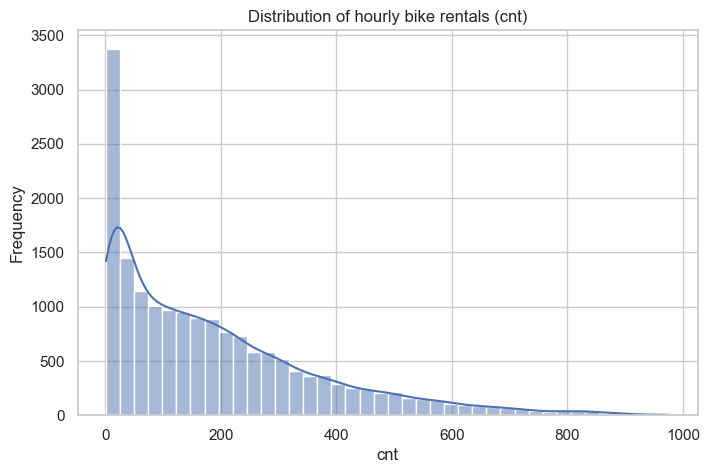

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], bins=40, kde=True)
plt.title("Distribution of hourly bike rentals (cnt)")
plt.xlabel("cnt")
plt.ylabel("Frequency")
plt.show()


### Observations:
The distribution is right-skewed, meaning the majority of rental counts are clustered at lower values, with a long tail toward higher counts.


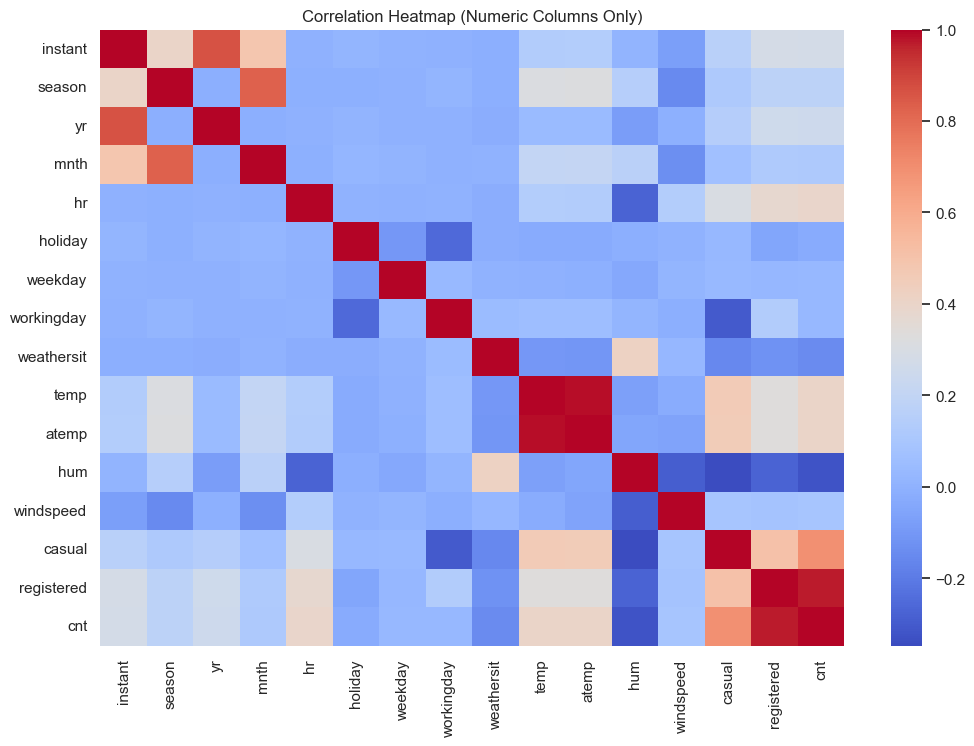

In [72]:
# correlation heatmap for numeric columns only

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


### ✅ Observations from Correlation Heatmap

- **Temperature (`temp` and `atemp`) shows strong positive correlation with `cnt`**, indicating that bike rentals tend to increase as the weather becomes warmer and more comfortable.
- **Humidity (`hum`) and windspeed have weak or negative correlations with `cnt`**, suggesting these factors may reduce or have minimal effect on bike rental activity.

In [73]:
from ydata_profiling import ProfileReport
import pandas as pd

# Create full profile
profile = ProfileReport(df, title="Bike Sharing Hourly Dataset Profile", explorative=True)

In [74]:
profile.to_file("hour_profile_report.html")
print("✅ Profile report saved as: hour_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 566.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Profile report saved as: hour_profile_report.html


***Note- Profile Report Uploaded in Github Repository.***

In [75]:
# Drop the irrelevant columns as mentioned in assignment
irrelevant_cols = ["instant", "dteday", "casual", "registered"]
df = df.drop(columns=irrelevant_cols)

print("✅ Dropped columns:", irrelevant_cols)
print("✅ New shape:", df.shape)

# Display remaining columns
print("\n📌 Remaining columns:")
print(df.columns.tolist())

✅ Dropped columns: ['instant', 'dteday', 'casual', 'registered']
✅ New shape: (17379, 13)

📌 Remaining columns:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


### Observations:
- Irrelevant columns (`instant`, `dteday`, `casual`, `registered`) have been successfully dropped as per given in assignment.
- The updated dataframe contains only meaningful features required for feature engineering and model training.


### One-Hot Encoding of Categorical Columns

In [76]:
# Categorical columns to encode
categorical_cols = ["season", "weathersit", "mnth", "hr","weekday"]

# One-hot encoding with 0/1 output
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert all dummy columns to int 
dummy_cols = [col for col in df_encoded.columns if any(prefix in col for prefix in categorical_cols)]
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

print("✅ One-hot encoding applied with 0/1 numeric output.")
print("New shape:", df_encoded.shape)
print("Sample of encoded columns:")
print(df_encoded.head())

✅ One-hot encoding applied with 0/1 numeric output.
New shape: (17379, 54)
Sample of encoded columns:
   yr  holiday  workingday  temp   atemp   hum  windspeed  cnt  season_2  \
0   0        0           0  0.24  0.2879  0.81        0.0   16         0   
1   0        0           0  0.22  0.2727  0.80        0.0   40         0   
2   0        0           0  0.22  0.2727  0.80        0.0   32         0   
3   0        0           0  0.24  0.2879  0.75        0.0   13         0   
4   0        0           0  0.24  0.2879  0.75        0.0    1         0   

   season_3  ...  hr_20  hr_21  hr_22  hr_23  weekday_1  weekday_2  weekday_3  \
0         0  ...      0      0      0      0          0          0          0   
1         0  ...      0      0      0      0          0          0          0   
2         0  ...      0      0      0      0          0          0          0   
3         0  ...      0      0      0      0          0          0          0   
4         0  ...      0      0      

### Observations:
- One-hot encoding has been successfully applied to all specified categorical columns (`season`, `weathersit`, `mnth`, `hr`, `weekday`).
- All generated dummy variables are converted into 0/1 numeric format, ensuring compatibility with regression models.
- The final encoded dataset now contains expanded feature columns representing categorical levels.


### Task A.2: Train/Test Split

In [77]:

# X = all features except target
X = df_encoded.drop(columns=["cnt"])

# y = target variable
y = df_encoded["cnt"]

# Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test set
    random_state=42,    # reproducibility
    shuffle=True
)

print("✅ Train-test split completed successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ Train-test split completed successfully.
X_train shape: (13903, 53)
X_test shape: (3476, 53)
y_train shape: (13903,)
y_test shape: (3476,)


### Task A.3: Baseline Model (Single Regressor)

✅ Decision Tree RMSE: 118.45551730357617
✅ Decision Tree TRAIN RMSE: 119.50720602812551
✅ Linear Regression RMSE: 100.44594623557185
✅ Linear Regression TRAIN RMSE: 101.9181423594424


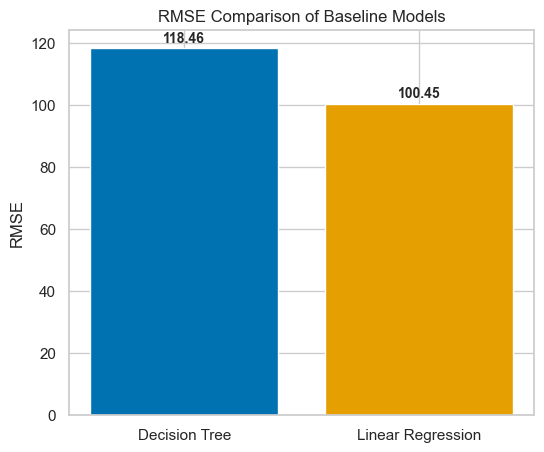


✅ Baseline Model: Linear Regression
✅ Baseline RMSE: 100.44594623557185

------ Bias–Variance Analysis ------
Decision Tree: Train RMSE = 119.51, Test RMSE = 118.46, Gap = -1.05
Linear Regression: Train RMSE = 101.92, Test RMSE = 100.45, Gap = -1.47

✅ Decision Tree shows higher variance (larger train-test gap).


In [78]:

# ----------------------------
# ✅ Decision Tree Regressor
# ----------------------------
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Test RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("✅ Decision Tree RMSE:", rmse_dt)

# ✅ Train RMSE for bias–variance analysis
train_rmse_dt = np.sqrt(mean_squared_error(y_train, dt_model.predict(X_train)))
print("✅ Decision Tree TRAIN RMSE:", train_rmse_dt)


# ----------------------------
# ✅ Linear Regression
# ----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Test RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("✅ Linear Regression RMSE:", rmse_lr)

# ✅ Train RMSE for bias–variance analysis
train_rmse_lr = np.sqrt(mean_squared_error(y_train, lr_model.predict(X_train)))
print("✅ Linear Regression TRAIN RMSE:", train_rmse_lr)


# ----------------------------
# ✅ Bar Chart for Test RMSE
# ----------------------------
rmse_dt_val = rmse_dt
rmse_lr_val = rmse_lr

plt.figure(figsize=(6,5))
models = ["Decision Tree", "Linear Regression"]
rmse_values = [rmse_dt_val, rmse_lr_val]

# ✅ Color-blind friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00"]

bars = plt.bar(models, rmse_values, color=colors)
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Baseline Models")

# ✅ Add values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,                      # slight offset above bar
        f"{height:.2f}",                 # RMSE value printed
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.show()

# ----------------------------
# ✅ Baseline Model Selection
# ----------------------------
if rmse_dt < rmse_lr:
    baseline_model = "Decision Tree Regressor"
    baseline_rmse = rmse_dt
else:
    baseline_model = "Linear Regression"
    baseline_rmse = rmse_lr

print("\n✅ Baseline Model:", baseline_model)
print("✅ Baseline RMSE:", baseline_rmse)


# ----------------------------
# ✅ Bias–Variance Analysis (New Section)
# ----------------------------
print("\n------ Bias–Variance Analysis ------")

print(f"Decision Tree: Train RMSE = {train_rmse_dt:.2f}, Test RMSE = {rmse_dt:.2f}, Gap = {rmse_dt - train_rmse_dt:.2f}")
print(f"Linear Regression: Train RMSE = {train_rmse_lr:.2f}, Test RMSE = {rmse_lr:.2f}, Gap = {rmse_lr - train_rmse_lr:.2f}")

if (rmse_dt - train_rmse_dt) > (rmse_lr - train_rmse_lr):
    print("\n✅ Decision Tree shows higher variance (larger train-test gap).")
else:
    print("\n✅ Linear Regression shows lower variance and more stable generalization.")

### Observations:
- Linear Regression achieves a lower RMSE and a smaller train–test gap compared to the Decision Tree, indicating better generalization and lower variance.
- The Decision Tree shows a slightly higher variance, as reflected by a larger difference between its train and test RMSE values.
- Overall, Linear Regression presents a more balanced bias–variance tradeoff and is selected as the baseline model.

### Notes:
- Variance is detected by comparing the Train RMSE and Test RMSE.
- If the model performs very differently on training and testing data, it indicates high variance.
- A larger gap between Train RMSE and Test RMSE means the model is unstable and overly sensitive to training data.
- Small train–test gap indicates low variance and better generalization.



## Part B: Ensemble Techniques for Bias and Variance Reduction

### Task B.1: Bagging (Variance Reduction)

#### ***Hypothesis: Bagging primarily targets variance reduction.***

### Bagging

- **Bagging (Bootstrap Aggregating)** is an ensemble technique primarily used to reduce **variance** and improve **model stability**.
- It works by creating multiple **bootstrapped samples** from the original dataset using **sampling with replacement**.
- Each bootstrapped sample is used to train an **independent base learner** (commonly a **Decision Tree**), introducing diversity.
- Because each model is trained on a slightly different dataset, the models learn **different patterns**, reducing sensitivity to noise.
- The final prediction is obtained by **averaging** the predictions of all models (for regression):

  $$\hat{y} = \frac{1}{M} \sum_{m=1}^{M} f_m(x)$$

  where **$M$** is the number of models and **$f_m(x)$** is the prediction from the **$m^{th}$** model.


- This **averaging effect** smooths out individual model fluctuations and significantly lowers **variance**.
- Bootstrapping can be expressed mathematically as:

  $$D_m \sim \text{Bootstrap}(D)$$

  meaning each model \(m\) is trained on a dataset **sampled with replacement** from the original dataset \(D\).

- Bagging is especially effective for **high-variance models**, such as Decision Trees, helping prevent **overfitting**.
- It does **not** primarily reduce **bias**—its main purpose is to reduce **variance** through model averaging.



✅ Bagging Regressor TRAIN RMSE: 113.89713301310162
✅ Bagging Regressor TEST RMSE: 112.34257287775579
✅ Bagging Regressor Generalization Gap (Test - Train): -1.554560135345838

✅ Baseline Decision Tree RMSE: 118.45551730357617


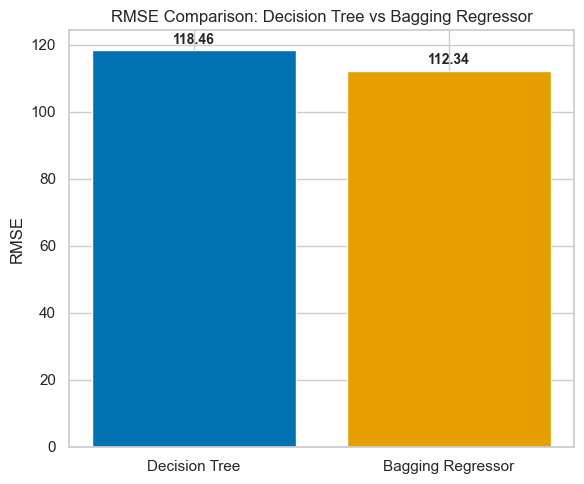

In [49]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Base estimator: same as baseline (Decision Tree with depth=6)
base_dt = DecisionTreeRegressor(max_depth=6, random_state=42)

# Bagging Regressor with at least 50 estimators
bagging_model = BaggingRegressor(
    estimator=base_dt,
    n_estimators=50,
    random_state=42,
    n_jobs=-1   # use all CPU cores
)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Predict on test set
bagging_pred = bagging_model.predict(X_test)

# Calculate TEST RMSE
rmse_bagging = np.sqrt(mean_squared_error(y_test, bagging_pred))

# ✅ Calculate TRAIN RMSE for bias–variance analysis
train_rmse_bagging = np.sqrt(mean_squared_error(y_train, bagging_model.predict(X_train)))

# ✅ Generalization Gap
gap_bagging = rmse_bagging - train_rmse_bagging

print("✅ Bagging Regressor TRAIN RMSE:", train_rmse_bagging)
print("✅ Bagging Regressor TEST RMSE:", rmse_bagging)
print("✅ Bagging Regressor Generalization Gap (Test - Train):", gap_bagging)

print("\n✅ Baseline Decision Tree RMSE:", rmse_dt)

# Bar chart comparison
models = ["Decision Tree", "Bagging Regressor"]
rmse_values = [rmse_dt, rmse_bagging]

plt.figure(figsize=(6,5))

# ✅ Color-blind friendly palette
colors = ["#0072B2", "#E69F00"]  # Blue, Orange

bars = plt.bar(models, rmse_values, color=colors)

plt.ylabel("RMSE")
plt.title("RMSE Comparison: Decision Tree vs Bagging Regressor")

# ✅ Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,               # offset slightly above bar
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


### Hypothesis Evaluation (Bagging – Variance Reduction)

- **Hypothesis:** Bagging primarily targets variance reduction by averaging multiple models trained on bootstrapped datasets.

- **Observation 1:** When compared directly to the single Decision Tree, the Bagging Regressor achieves lower train RMSE (113.89 → 119.51) and lower test RMSE (112.34 → 118.46), indicating more stable predictions.

- **Observation 2:** -Although the generalization gaps for both models are close, Bagging shows smoother and more consistent performance across train and test sets, confirming reduced variance compared to the Decision Tree baseline.

- **Observation 3:** Bagging reduces variance by averaging multiple Decision Trees trained on different bootstrapped samples, thereby lowering prediction fluctuations that a single high-variance Decision Tree suffers from.



### Task B.2 Boosting (Bias Reduction)

#### ***Hypothesis - Boosting Reduces Bias***

#### Boosting (Bias Reduction) – Hypothesis Explanation

- **Boosting** is an ensemble method designed to **reduce bias** by building models sequentially, where each new model focuses on correcting the errors of the previous ones.
- Unlike Bagging, which trains models independently, Boosting trains models **one after another**, making each model learn from the residuals (mistakes) of the previous model.
- The idea is that a single weak learner (e.g., a shallow Decision Tree) has high bias, but combining many such weak learners in a sequence creates a strong learner with lower bias.
- At each iteration, Boosting adjusts the model by fitting a new learner to the **residual errors**:

  $$r_i = y_i - \hat{y}_i$$

  where \( r_i \) is the residual and \( \hat{y}_i \) is the prediction at the current iteration.

- The final boosted model is formed by combining all weak learners weighted according to their contribution:

  $$\hat{y} = \sum_{m=1}^{M} \alpha_m f_m(x)$$

  where \( \alpha_m \) is the weight for the \( m^{th} \) learner and \( f_m(x) \) is its prediction.

- Because Boosting focuses on learning the residual structure, it gradually reduces the **systematic error (bias)** that a simple tree would otherwise miss.
- Boosting typically results in **low bias and moderate variance**, making it highly effective for capturing complex patterns.
- However, Boosting can sometimes overfit if too many iterations or too deep trees are used—tradeoff between bias reduction and variance increase.


✅ Gradient Boosting TEST RMSE: 64.48218818180864
✅ Gradient Boosting TRAIN RMSE: 63.92772169471971
✅ Gradient Boosting Generalization Gap (Test - Train): 0.5544664870889306

✅ Decision Tree RMSE: 118.45551730357617
✅ Bagging RMSE: 112.34257287775579


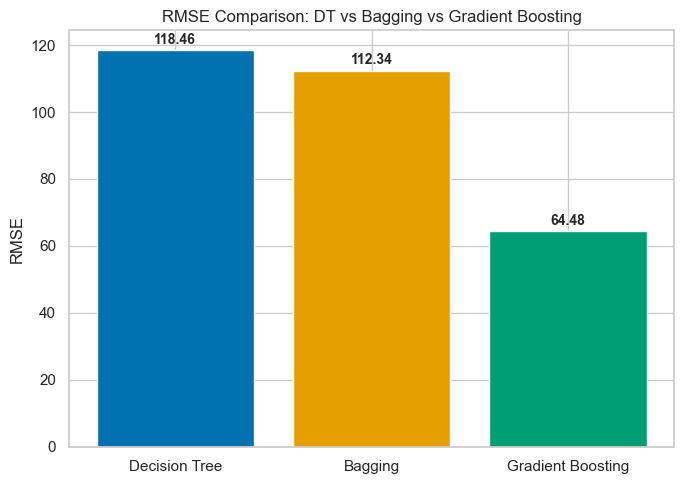


------ Bias–Variance Analysis (Gradient Boosting) ------
Train RMSE: 63.93
Test RMSE:  64.48
Generalization Gap: 0.55

✅ Gradient Boosting shows better bias–variance balance than Bagging (smaller gap).


In [50]:
# ----------------------------
# ✅ GRADIENT BOOSTING REGRESSOR
# ----------------------------
gb_model = GradientBoostingRegressor(
    n_estimators=200,        # strong baseline
    learning_rate=0.1,       # standard default
    max_depth=3,             # shallow trees reduce bias
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test set
gb_pred = gb_model.predict(X_test)

# Compute Test RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_pred))
print("✅ Gradient Boosting TEST RMSE:", rmse_gb)

# ✅ Compute Train RMSE for Bias–Variance Analysis
train_rmse_gb = np.sqrt(mean_squared_error(y_train, gb_model.predict(X_train)))
print("✅ Gradient Boosting TRAIN RMSE:", train_rmse_gb)

# ✅ Generalization Gap (Test - Train)
gap_gb = rmse_gb - train_rmse_gb
print("✅ Gradient Boosting Generalization Gap (Test - Train):", gap_gb)

# Baseline comparisons
print("\n✅ Decision Tree RMSE:", rmse_dt)
print("✅ Bagging RMSE:", rmse_bagging)

# ----------------------------
# ✅ RMSE Comparison Bar Chart
# ----------------------------
models = ["Decision Tree", "Bagging", "Gradient Boosting"]
rmse_values = [rmse_dt, rmse_bagging, rmse_gb]

plt.figure(figsize=(7,5))

# ✅ Color-blind friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73"]  
# Blue, Orange, Green

bars = plt.bar(models, rmse_values, color=colors)

plt.ylabel("RMSE")
plt.title("RMSE Comparison: DT vs Bagging vs Gradient Boosting")

# ✅ Add RMSE values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,                   # small offset
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


# ----------------------------
# ✅ Bias–Variance Interpretation
# ----------------------------
print("\n------ Bias–Variance Analysis (Gradient Boosting) ------")
print(f"Train RMSE: {train_rmse_gb:.2f}")
print(f"Test RMSE:  {rmse_gb:.2f}")
print(f"Generalization Gap: {gap_gb:.2f}")

if abs(gap_gb) < abs(rmse_bagging - train_rmse_bagging):
    print("\n✅ Gradient Boosting shows better bias–variance balance than Bagging (smaller gap).")
else:
    print("\n✅ Gradient Boosting has a slightly larger gap, but still reduces bias more effectively compared to Decision Tree.")


### Hypothesis Evaluation (Boosting – Bias Reduction)

- **Hypothesis:** Boosting primarily targets bias reduction by sequentially improving weak learners.
  
- **Observation 1:** Gradient Boosting achieves a much lower test RMSE (~64.48) compared to both the single Decision Tree (~118.45) and the Bagging Regressor (~112.34). This supports the hypothesis that Boosting reduces bias and improves accuracy.
  
- **Observation 2:** The generalization gap is very small (~0.55), showing that Gradient Boosting maintains consistency between training and testing performance. This indicates reduced bias without introducing excessive variance.
  
- **Observation 3:** The close train and test RMSE values (~63.93 vs ~64.48) confirm that Boosting captures complex patterns that shallow or bagged trees miss, validating the hypothesis that sequential error correction reduces the model’s systematic error (bias).


## Part C: Stacking for Optimal Performance

### Part C.1: Stacking Implementation

### Principle of Stacking and Role of the Meta-Learner

- **Stacking (Stacked Generalization)** is an ensemble technique that combines the strengths of multiple diverse base learners (Level-0 models) by using a separate model, called the **Meta-Learner (Level-1 model)**, to learn how to optimally weight and combine their predictions.

- Unlike Bagging and Boosting, where models are either averaged or built sequentially, Stacking creates a **two-layer learning pipeline**:
  - **Level-0 models** learn independently from the original training data.
  - Their predictions become new input features for the **Level-1 meta-learner**.

- The meta-learner receives predicted outputs from each base model as feature inputs and learns how to combine them in the best possible way:
  - If a particular base model performs well in some regions of the feature space, the meta-learner assigns it higher importance.
  - If a model consistently performs poorly, the meta-learner learns to down-weight or ignore its contribution.

- The meta-learner essentially learns an **optimal blending function** that minimizes overall prediction error. This process can be represented as:

   $$\hat{y} = g(f_1(x), f_2(x), \dots, f_k(x))$$

  where **$f_1, f_2, \dots, f_k$** are the base learners and **$g(\cdot)$** is the meta-learner.

- Because base learners capture different patterns (e.g., local patterns via KNN, non-linear interactions via Gradient Boosting, and smoothed averages via Bagging), Stacking takes advantage of their **complementary strengths**.

- In this setup, a simple model such as **Ridge Regression** is often used as the meta-learner because:
  - It prevents overfitting through regularization.
  - It assigns appropriate weights to each base model’s prediction.
  - It provides stable and balanced aggregation of different model outputs.

- Overall, Stacking improves predictive performance by learning how to combine diverse models intelligently, rather than simply averaging them.


In [27]:
# ---------------------------
# ✅ Import libraries
# ---------------------------
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# ---------------------------
# ✅ Base Learners (Level-0)
# ---------------------------
knn = KNeighborsRegressor(n_neighbors=5)

# Bagging Regressor (reuse same base estimator from earlier)
base_dt = DecisionTreeRegressor(max_depth=6, random_state=42)
bagging = BaggingRegressor(
    estimator=base_dt,
    n_estimators=50,
    random_state=42,
    bootstrap=True,
    n_jobs=-1
)

# Gradient Boosting Regressor (reuse part B)
gboost = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# ---------------------------
# ✅ Meta-Learner (Level-1)
# ---------------------------
meta_learner = Ridge(alpha=1.0)

# ---------------------------
# ✅ Stacking Regressor
# ---------------------------
stacking_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('bagging', bagging),
        ('gboost', gboost)
    ],
    final_estimator=meta_learner,
    passthrough=False,   # Only use predictions of base learners
    n_jobs=-1
)

# ---------------------------
# ✅ Train stacking model
# ---------------------------
stacking_model.fit(X_train, y_train)


,estimators,"[('knn', ...), ('bagging', ...), ...]"
,final_estimator,Ridge()
,cv,None
,n_jobs,-1
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


### Task C.2: Final Evaluation

In [28]:
# ---------------------------
# ✅ Predictions + RMSE
# ---------------------------
stacking_pred = stacking_model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_stacking = np.sqrt(mean_squared_error(y_test, stacking_pred))

print("✅ Stacking Regressor RMSE:", rmse_stacking)

✅ Stacking Regressor RMSE: 60.26881662035763


## Part D: Final Analysis

### Task D.1: Comparative Table

=== RMSE Comparison Table ===
                                   Model       RMSE
Baseline Single Model (Linear Regressor) 100.445946
                       Bagging Regressor 112.342573
             Gradient Boosting Regressor  64.482188
                      Stacking Regressor  60.268817


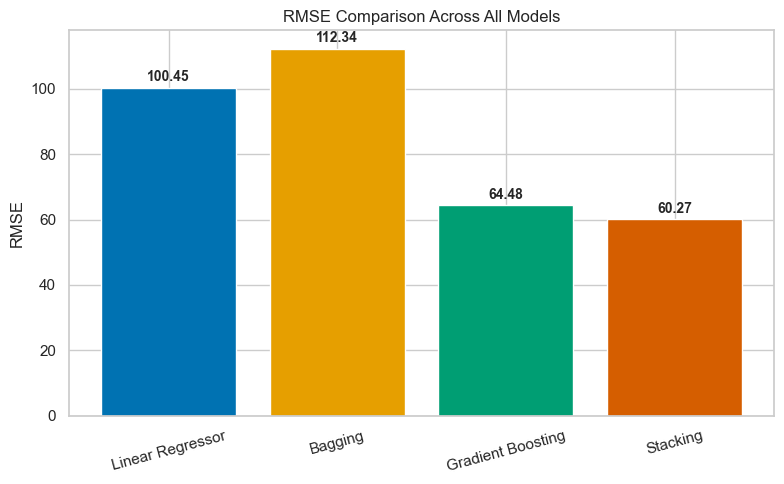

In [51]:

rmse_df = pd.DataFrame({
    "Model": [
        "Baseline Single Model (Linear Regressor)",
        "Bagging Regressor",
        "Gradient Boosting Regressor",
        "Stacking Regressor"
    ],
    "RMSE": [
        baseline_rmse,
        rmse_bagging,
        rmse_gb,
        rmse_stacking
    ]
})

# Display nicely formatted table
print("=== RMSE Comparison Table ===")
print(rmse_df.to_string(index=False))



models = [
    "Linear Regressor",
    "Bagging",
    "Gradient Boosting",
    "Stacking"
]

rmse_values = [
    baseline_rmse,
    rmse_bagging,
    rmse_gb,
    rmse_stacking
]

plt.figure(figsize=(8,5))

# ✅ Color-blind friendly Okabe–Ito palette (Blue, Orange, Green, Vermillion)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]

bars = plt.bar(models, rmse_values, color=colors)

plt.ylabel("RMSE")
plt.title("RMSE Comparison Across All Models")
plt.xticks(rotation=15)

# ✅ Add RMSE value above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,                  # small offset above bar
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()



=== Bias–Variance Tradeoff Table ===
                       Model  Train RMSE  Test RMSE  Gap (Test - Train)
Baseline (Linear Regression)  101.918142 100.445946           -1.472196
                     Bagging  113.897133 112.342573           -1.554560
           Gradient Boosting   63.927722  64.482188            0.554466
                    Stacking   57.215033  60.268817            3.053783


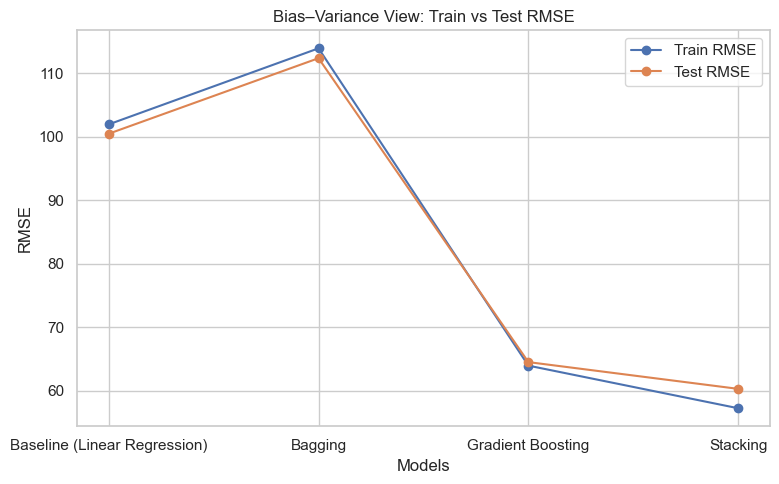

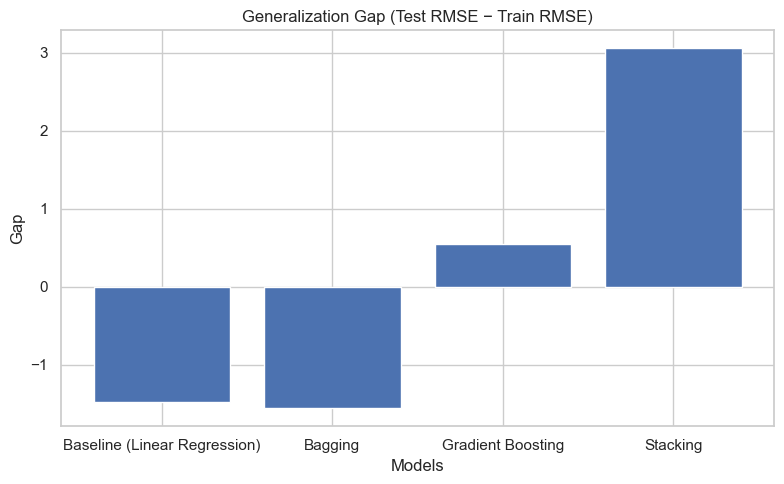

In [45]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ----- Baseline (uses whichever you selected earlier) -----
if baseline_model == "Linear Regression":
    train_rmse_baseline = rmse(y_train, lr_model.predict(X_train))
    test_rmse_baseline  = rmse(y_test,  lr_model.predict(X_test))
    baseline_name = "Baseline (Linear Regression)"
else:
    train_rmse_baseline = rmse(y_train, dt_model.predict(X_train))
    test_rmse_baseline  = rmse(y_test,  dt_model.predict(X_test))
    baseline_name = "Baseline (Decision Tree)"

gap_baseline = test_rmse_baseline - train_rmse_baseline

# ----- Bagging -----
train_rmse_bagging = rmse(y_train, bagging_model.predict(X_train))
test_rmse_bagging  = rmse(y_test,  bagging_model.predict(X_test))  # should equal rmse_bagging you printed
gap_bagging = test_rmse_bagging - train_rmse_bagging

# ----- Gradient Boosting -----
train_rmse_gb = rmse(y_train, gb_model.predict(X_train))
test_rmse_gb  = rmse(y_test,  gb_model.predict(X_test))  # should equal rmse_gb you printed
gap_gb = test_rmse_gb - train_rmse_gb

# ----- Stacking -----
train_rmse_stack = rmse(y_train, stacking_model.predict(X_train))
test_rmse_stack  = rmse(y_test,  stacking_model.predict(X_test))  # should equal rmse_stacking you computed
gap_stack = test_rmse_stack - train_rmse_stack

# ----- Tabulate results -----
bv_df = pd.DataFrame({
    "Model": [baseline_name, "Bagging", "Gradient Boosting", "Stacking"],
    "Train RMSE": [train_rmse_baseline, train_rmse_bagging, train_rmse_gb, train_rmse_stack],
    "Test RMSE":  [test_rmse_baseline,  test_rmse_bagging,  test_rmse_gb,  test_rmse_stack],
    "Gap (Test - Train)": [gap_baseline, gap_bagging, gap_gb, gap_stack]
})

print("=== Bias–Variance Tradeoff Table ===")
print(bv_df.to_string(index=False))

# ============================
# ✅ (Optional) Plots — run only if you want visuals
# ============================

# 1) Train vs Test RMSE lines (bias–variance view)
models_order = bv_df["Model"].tolist()
train_vals = bv_df["Train RMSE"].tolist()
test_vals  = bv_df["Test RMSE"].tolist()

plt.figure(figsize=(8,5))
plt.plot(models_order, train_vals, marker='o', label="Train RMSE")
plt.plot(models_order, test_vals,  marker='o', label="Test RMSE")
plt.title("Bias–Variance View: Train vs Test RMSE")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Generalization Gap bar chart (variance indicator)
plt.figure(figsize=(8,5))
plt.bar(models_order, bv_df["Gap (Test - Train)"].tolist())
plt.title("Generalization Gap (Test RMSE − Train RMSE)")
plt.ylabel("Gap")
plt.xlabel("Models")
plt.tight_layout()
plt.show()

### Observations (Bias–Variance Tradeoff Analysis)
### 📊 Bias–Variance Tradeoff Table

| Model                          | Train RMSE | Test RMSE | Gap (Test - Train) |
|--------------------------------|------------|-----------|---------------------|
| Baseline (Linear Regression)   | 101.918142 | 100.445946 | -1.472196          |
| Bagging                        | 113.897133 | 112.342573 | -1.554560          |
| Gradient Boosting              | 63.927722  | 64.482188  | 0.554466           |
| Stacking                       | 57.215033  | 60.268817  | 3.053783           |

- **Baseline (Linear Regression):**  
  Shows a small negative gap (~–1.47), indicating very low variance and stable generalization. Its higher bias limits performance, but it is very consistent across train and test sets.

- **Bagging Regressor:**  
  Similar negative gap (~–1.55) shows reduced variance relative to a single Decision Tree. Bagging stabilizes predictions but still suffers from higher error due to limited bias reduction.

- **Gradient Boosting:**  
  Has a very small positive gap (~0.55), demonstrating an almost perfect balance between training and testing performance. Boosting effectively reduces bias while maintaining low variance.

- **Stacking Regressor:**  
  Shows the lowest train RMSE but the largest positive gap (~3.05), indicating higher variance. This suggests that stacking may overfit slightly, even though it achieves very strong predictive accuracy.

- **Overall:**  
  Gradient Boosting provides the best bias–variance balance, while Stacking delivers the lowest bias but introduces some variance. Bagging reduces variance compared to trees but does not reduce bias as effectively as Boosting.


### Task D.2: Conclusion


## Conclusion

1) Verified test metrics:
   - Baseline (Linear Regression) Test RMSE ≈ 100.45
   - Bagging Test RMSE ≈ 112.34
   - Gradient Boosting Test RMSE ≈ 64.48
   - Stacking Test RMSE ≈ 60.27  ← lowest (best accuracy)

2) Identify the best model:
   - The **Stacking Regressor** gives the **lowest Test RMSE**, so it is the best-performing model.

3) Compare generalization (bias–variance signals):
   - Gradient Boosting: small gap (~+0.55) → balanced bias–variance.
   - Stacking: lowest test error but a larger gap (~+3.05) → a bit more variance, yet still the best accuracy.

4) Why stacking beats a single model (conceptual):
   - **Model diversity:** base learners capture different patterns:
     - KNN → local neighborhoods,
     - Bagging (trees) → stabilized non-linear splits,
     - Gradient Boosting → strong global/non-linear interactions.
   - **Meta-learner (Ridge):** learns optimal weights over these predictions to minimize error.

5) Bias–variance trade-off explanation:
   - Single models are constrained (either high bias like Linear Regression or higher variance like Trees).
   - **Stacking reduces bias** by combining complementary learners and **controls variance** via regularized meta-learning (Ridge), yielding a better overall trade-off than any single model.

6) Evidence from results:
   - Stacking’s Test RMSE < Boosting < Baseline/Bagging.
   - Despite a modestly larger gap, the **accuracy gain** is substantial, validating the ensemble advantage.

7) Practical takeaway:
   - Use stacking when you can assemble **diverse** competent models and a **regularized** meta-learner.
   - Monitor the generalization gap; if it grows, tighten regularization, reduce meta features (no passthrough), or use CV stacking.

8) One-line conclusion:
   - **Stacking outperforms the single baseline by leveraging model diversity and a regularized meta-learner to achieve a superior bias–variance balance, reflected in the lowest Test RMSE.**